<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/2ndWeekTasks/Polynomial%20Regression/Polynomial_Regression_on_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 2 Polynomial Regression

Dataset : exercise.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/17426f08-91a4-4b41-9cab-870a3eb9c0cb

# 1. MOUNT GOOGLE DRIVE

In [40]:
from google.colab import drive

# Menghubungkan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# -MEMBUAT MODEL POLYNOMIAL REGRESSION-

Prompt ChatGPT : tolong buatkan model polynomial regression dengan dataset exercise.csv

# 2. IMPORT LIBRARY

In [41]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/exercise.csv')

In [42]:
df.head() # menampilkan data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# 3. PEMBUATAN MODEL

In [43]:
# Pisahkan atribut dan target
X = df[['Heart_Rate']]
y = df['Body_Temp']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek PolynomialFeatures untuk membuat fitur-fitur polinomial
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat polinomial 3

# Transformasi fitur X menjadi fitur-fitur polinomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train_poly, y_train)

# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test_poly)


# 4. EVALUASI MODEL
Prompt ChatGPT : Berikan kode untuk melakukan evaluasi dengan menggunakan RMSE, MAE, MAPPE, R2

In [44]:
# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2:", r2)

RMSE: 0.47949691988845705
MAE: 0.3564296852169767
MAPE: 0.898187345333817
R2: 0.6261946078775089


# 5. VISUALISASI MODEL
Prompt ChatGPT : Berikan kode untuk memvisualisasikan scatter plot dari hasil model polynomial regression diatas

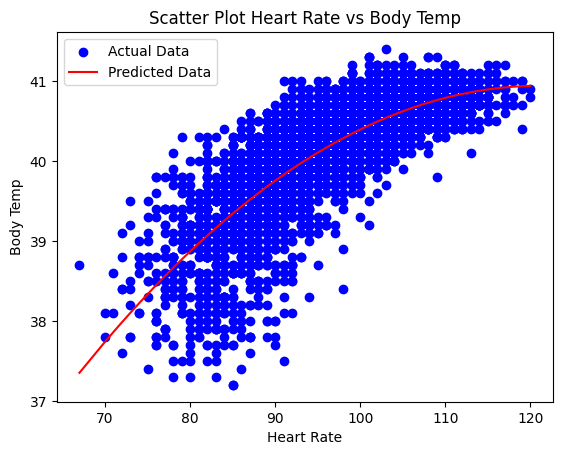

In [45]:
# Mengurutkan data uji berdasarkan Heart_Rate
sort_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[sort_indices]
y_test_sorted = y_test.values[sort_indices]

# Mengurutkan hasil prediksi sesuai dengan urutan data uji yang telah diurutkan
y_pred_sorted = y_pred[sort_indices]

# Membuat scatter plot dari data uji
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Menambahkan plot dari hasil prediksi
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted Data')

plt.title('Scatter Plot Heart Rate vs Body Temp')
plt.xlabel('Heart Rate')
plt.ylabel('Body Temp')
plt.legend()
plt.show()

**Perbandingan antara nilai aktual dengan hasil prediksi yang dibuat oleh model polynomial regression**

In [46]:
# Menampilkan nilai aktual dan nilai prediksi
actual_vs_predicted = np.column_stack((y_test, y_pred))
print("Actual vs Predicted : ")
print(actual_vs_predicted)

Actual vs Predicted : 
[[40.6        40.69489176]
 [40.5        40.81375885]
 [40.         39.75265069]
 ...
 [40.2        40.58003226]
 [39.2        39.42811022]
 [41.2        40.90725164]]


**Menambahkan data baru lalu meminta model untuk melakukan prediksi**

Prompt ChatGPT : Bagaimana cara menginputkan data baru dan meminta agar model memberikan prediksi dari data yang kita saya masukkan tadi?

In [47]:
# Misalkan kita memiliki data baru untuk heart rate 90
new_data = pd.DataFrame({'Heart_Rate': [90]})

# Lakukan transformasi polinomial sesuai dengan pola yang sama dengan saat melatih model
new_data_poly = poly.transform(new_data)

# Lakukan prediksi dengan model yang telah dilatih
predicted_temp = model.predict(new_data_poly)

# Tampilkan hasil prediksi
print("Prediksi Suhu Tubuh untuk Detak Jantung = 90 :", predicted_temp)

Prediksi Suhu Tubuh untuk Detak Jantung = 90 : [39.75265069]
